## Problem Statement
### Lead Score Case Study
#### An Education company named X Education sells online courses to industry professionals and markets its courses on several websites and search engines like Google and those who are interested in the courses land on their website, browse for courses, and some of the leads get converted while most do not. The typical lead conversion rate at X Education is around 30% which is very poor, to make this process more efficient, the company wishes to identify the most potential leads, also known as 'Hot Leads'. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Objective
#### X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. You are required to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has qiven a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study
#### Build a logistic regression model to assign a lead score between 0 to 100 to each of the leads which can be used by the company  to target potential leads. A high score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
#### The model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. 

### Steps
#### Reading and Understanding the Data
#### Cleaning the  Data
#### Preparing the Data for Model Building
#### Model Building
#### Model Evaluation
#### Making Prediction on Test Set Data.

# **IMPORTING THE MODULES**

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# supressing the warnings 
import warnings
warnings.filterwarnings('ignore')

# show maximum rows and columns 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

In [311]:
leads = pd.read_csv('/content/drive/MyDrive/Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting the Dataframe 

In [312]:
#  check the dimensions of the dataframe
leads.shape

(9240, 37)

In [313]:
# statistical aspects of the dataframe 
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# **DATA CLEANING**

In [314]:
# Checking for any duplicate rows
leads.duplicated().sum()

0

Hence, there are no duplicate rows in the data.

## HANDLING MISSING VALUES

### CHECKING COLUMN WISE MISSING DATA

In [315]:
#  convert select values to NaN
leads = leads.replace("Select", np.NaN)

In [316]:
# checking the missing value percentage column wise
leads.isnull().sum()*100/len(leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [317]:
# LISTING THE VARIABLES WHICH HAVE MORE THAN 40% NULL VALUES
perc_col = pd.DataFrame(leads.isnull().sum()*100/len(leads)).reset_index()
null_col = perc_col[perc_col.iloc[:,1]>40.0]['index']
null_col = list(null_col)
null_col

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

Conclusion:
1. Columns with null percentage more than 40 percent are not considered to be good for analysis. So, we need to drop the columns.

In [318]:
#  dropping the columns with more than 40 percent null values 
leads = leads.drop(null_col, axis = 1)
leads.shape

(9240, 30)

In [319]:
#  checking for the null values again 
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

### CHECKING ROW WISE MISSING DATA

In [320]:
# CALCULATING THE PERCENTAGE NULL VALUES FOR EACH ROWS AND STORING THE PERCENATGE NULL VALUES IN AN ARRAY
# LEAD_DATA HAS THE LIST OF NULL PERCENTAGE OF EACH ROW
lead_data =[]
for i in range(len(leads)):
  lead_data.append(leads.iloc[i,:].isnull().sum()*100/leads.shape[1])
lead_data = np.array(lead_data)
lead_data.reshape(-1)


array([10.        ,  6.66666667,  0.        , ...,  0.        ,
       10.        ,  0.        ])

In [321]:
# ROW_SUMMARY IS THE DATAFRAME CONTAINING THE ROW NUMBERS AND THEIR NULL PERCENTAGE
row_summary = pd.DataFrame(lead_data, columns = ['percentage'])
row_summary[row_summary['percentage'] >= 70.0]

,percentage


So, Maximum null percentage available for any row in the data is 20 percent. So, we dont need to drop any row from the dataset

In [322]:
# Checking the null values in the dataset
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

### DATA IMPUTATION AND DATA STANDARDISATION

#### CATEORICAL VARIABLES

In [323]:
# listin th cateories in Lead soruce with their percentage of data they hold in it
leads['Lead Source'].value_counts(normalize= True, dropna =False)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

CONCLUSION :
1. google and Google are same so they need to be in the same category.
2. Except first 5 categories all other categories donot make more than 5% together so they can be clubbed into separate category called Other Lead Sources.

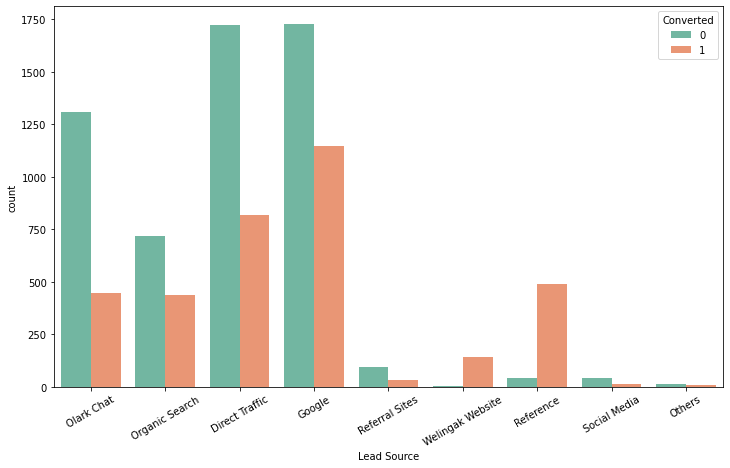

In [324]:
# standardising the data for lead source as some cateories had same value with different case
leads['Lead Source'] = leads['Lead Source'].apply(lambda x: 'Google' if (x == 'Google' or x == 'google') else x)
leads['Lead Source'] = leads['Lead Source'].replace('Facebook', 'Social Media')
# last_act is the dataframe containing categories types and their percentage of data they hold
last_act = leads['Lead Source'].value_counts(normalize = True).reset_index()
last_act.rename(columns = { 'index' : 'Category', 'Lead Source': 'percentage'}, inplace = True)
cat_list = []
# running a loop to add the columns with percentage less than a threshold into a list
for i in range(len(last_act)):
  if (last_act.iloc[i,1]) < 0.004:
    cat_list.append(last_act.iloc[i,0])

leads['Lead Source'] = leads['Lead Source'].apply(lambda x: 'Others' if x in cat_list else x)

# Visualizing
plt.figure(figsize = (12, 7))
c1 = sns.countplot(leads['Lead Source'], hue = leads.Converted, palette = 'Set2')
c1.set_xticklabels(c1.get_xticklabels(), rotation = 30)
plt.show()

In [325]:
# Handle the missing values for Lead Source
leads['Lead Source'].fillna(leads['Lead Source'].mode()[0], inplace = True)
# Imputed with mode since it is a categorical variable

Last Activity

In [326]:
leads['Last Activity'].value_counts(normalize = True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

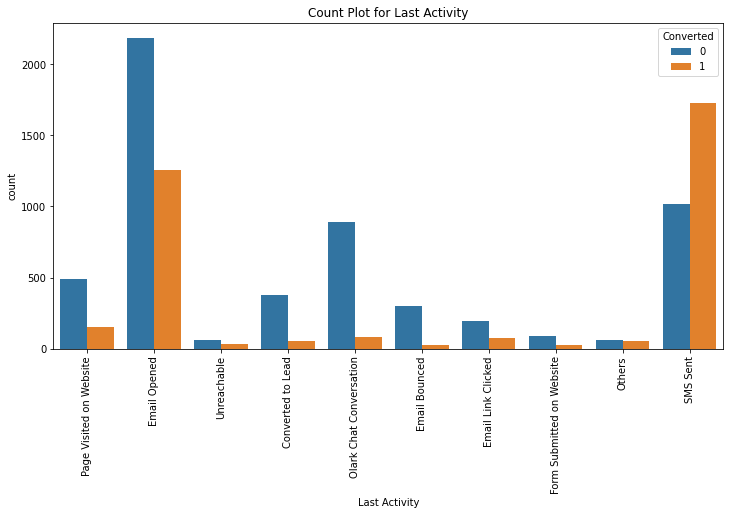

In [327]:
last_act = leads['Last Activity'].value_counts(normalize = True).reset_index()
last_act.rename(columns = { 'index' : 'Category', 'Last Activity': 'percentage'}, inplace = True)
cat_list = []
# running a loop to add the columns with percentage less than a threshold into a list
for i in range(len(last_act)):
  if (last_act.iloc[i,1]) < 0.01:
    cat_list.append(last_act.iloc[i,0])

# converting the categories with less than 2 percent into othe categories

leads['Last Activity'] = leads['Last Activity'].apply(lambda x: 'Others' if x in cat_list else x)
plt.figure(figsize = (12,6))
sns.countplot(data = leads, x = 'Last Activity', hue = 'Converted')
plt.title('Count Plot for Last Activity')
plt.xticks(rotation = 90)
plt.show()

OBSERVATIONS: 
1. More Conversions hae been rceived from SMS sent and Email opened Category.

In [328]:
leads['Last Activity'].fillna(leads['Last Activity'].mode()[0], inplace = True)
# Last Activity is also cateorical variable

In [329]:
leads['Last Activity'].value_counts(normalize = True)

Email Opened                 0.383117
SMS Sent                     0.297078
Olark Chat Conversation      0.105303
Page Visited on Website      0.069264
Converted to Lead            0.046320
Email Bounced                0.035281
Email Link Clicked           0.028896
Form Submitted on Website    0.012554
Others                       0.012121
Unreachable                  0.010065
Name: Last Activity, dtype: float64

Country

In [330]:
leads['Country'].value_counts(normalize = True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

OBSRVATIONS:
1. India is the most common occurence in the column
2. Replace NaN by India ( mode for categorical)

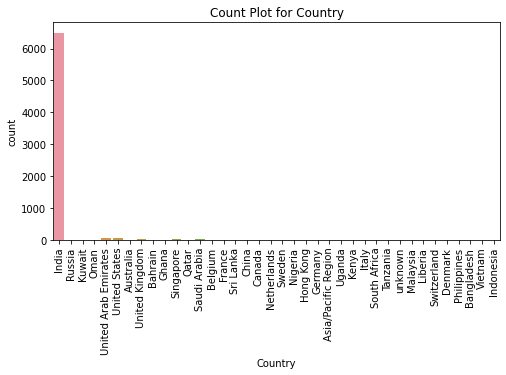

In [331]:
plt.figure(figsize = (8,4))
sns.countplot(data = leads, x = 'Country')
plt.title('Count Plot for Country')
plt.xticks(rotation = 90)
plt.show()

CONCLUSION:
1. THIS IS A HIGHLY SKEWED VARIABLE. INDIA IS HAVING MORE THAN 95 % VALUES. SO THIS COLUMN CAN BE DROPPED. IT IS NOT FIT FOR MODELLING.

In [332]:
#  Dropping the Country Column from the lead data
leads = leads.drop('Country', axis = 1)

Current Occupation

In [333]:
# Value counts of What is your current occupation
leads['What is your current occupation'].value_counts(normalize = True, dropna = False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

CONCLUSION : 
1. Unemployed has nearly 60 percent of the data.
2. There are 29% missing Values.
3. there are 7 percent approx working professional
4. Student are around 3 perent
5. Others can be grouped together. 

But first we need to check after adding the mode to the nan values what is the distribution. 


In [334]:
leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0], inplace = True)
leads['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

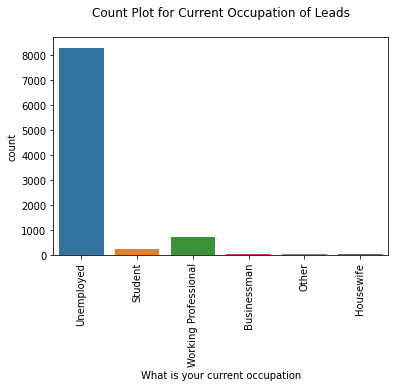

In [335]:
# Visualizing the counts of each category
c1 = sns.countplot(leads['What is your current occupation'])
plt.title('Count Plot for Current Occupation of Leads\n')
c1.set_xticklabels(c1.get_xticklabels(), rotation = 90)
plt.show()

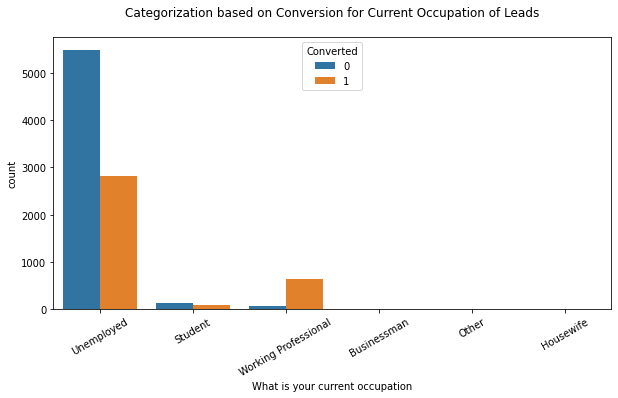

In [336]:
# Visualizing the counts of each category
plt.figure(figsize = (10,5))
c1 = sns.countplot(leads['What is your current occupation'], hue = leads.Converted)
plt.title('Categorization based on Conversion for Current Occupation of Leads\n')
c1.set_xticklabels(c1.get_xticklabels(), rotation = 30)
plt.show()

OBSERVATIONS: 
1. So, this is a highly skewed variable and it should be removed.
2. But, it seems like it has some information which can help the performance of the model. So, we are keeping this Feature.
3. The Segmented graph shows unemployed and Working professional have high chance of Conversion.

In [337]:
# Checking Value Counts
leads['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [338]:
# Replacing NaN with Better Career Prospects
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [339]:
leads['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False)

Better Career Prospects      0.999675
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

OBSERVATIONS:
1. hIGHLY SKEWED DATA SO SHOULD BE REMOVED.

What matters more during Course

In [340]:
leads= leads.drop('What matters most to you in choosing a course', axis = 1)

In [341]:
leads.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                    0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                  0
Specialization                              3380
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates

Specialization

In [342]:
# Checking value counts of Specialization column
leads.Specialization.value_counts(dropna = False, normalize = True)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

OBSERVATIONS:
1. Here, All kinds of Managements can be grouped together into one single management Specializations.
2. But, number of missing values is more than any other category. 
3. So, instead of assigning any mode to be imputed we can categorise the missing values as Not specified.

In [343]:
# Replace NaN with Not Specified
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

In [344]:
# Management Specializations
leads['Specialization'] = leads['Specialization'].replace(['IT Projects Management', 'Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'Retail Management', 'Hospitality Management', 'Healthcare Management', 'Supply Chain Management'], 'Management Specializations')

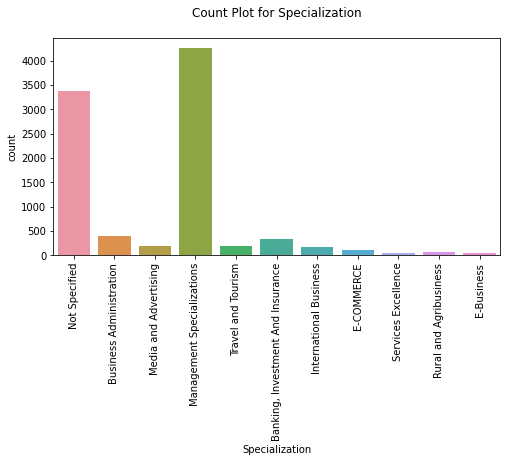

In [345]:
# Visualizing the counts of each category
plt.figure(figsize = (8,4))
sns.countplot(data = leads, x = 'Specialization')
plt.title('Count Plot for Specialization\n')
plt.xticks(rotation = 90)
plt.show()

Tags

In [346]:
leads['Tags'].value_counts(normalize = True, dropna = False)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

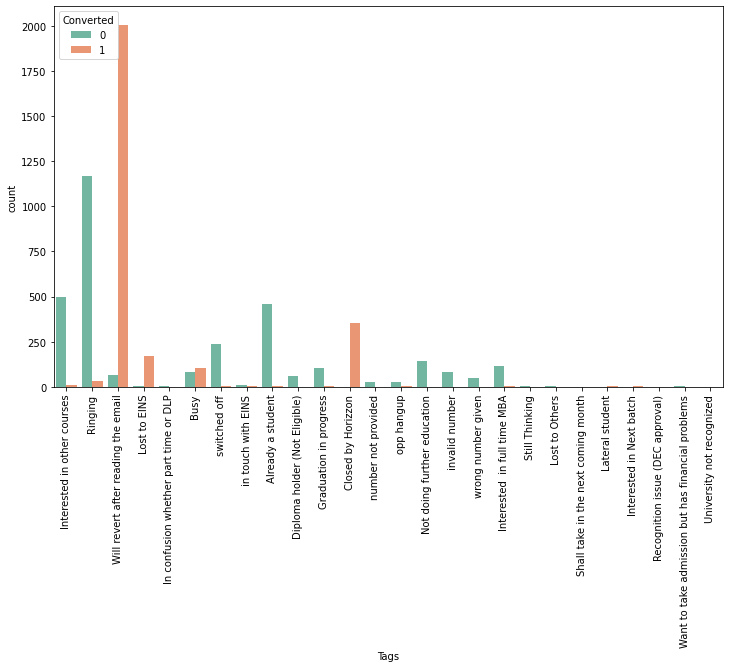

In [347]:
# Visualizing the counts of each category
plt.figure(figsize = (12, 7))
c1 = sns.countplot(leads.Tags, hue = leads.Converted, palette = 'Set2')
c1.set_xticklabels(c1.get_xticklabels(), rotation = 90)
plt.show()

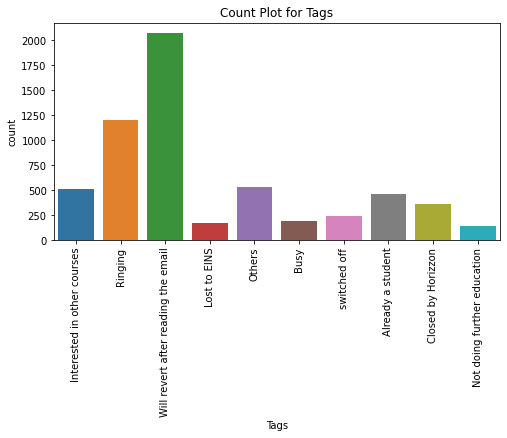

In [348]:
last_act = leads['Tags'].value_counts(normalize = True).reset_index()
last_act.rename(columns = { 'index' : 'Category', 'Tags': 'percentage'}, inplace = True)
cat_list = []
for i in range(len(last_act)):
  if (last_act.iloc[i,1]) < 0.02:
    cat_list.append(last_act.iloc[i,0])

# converting the categories with less than 2 percent into other categories
leads['Tags'] = leads['Tags'].apply(lambda x: 'Others' if x in cat_list else x)
plt.figure(figsize = (8,4))
sns.countplot(data = leads, x = 'Tags')
plt.title('Count Plot for Tags')
plt.xticks(rotation = 90)
plt.show()

In [349]:
leads['Tags'] = leads['Tags'].fillna(leads['Tags'].mode()[0])

In [350]:
leads['City'].value_counts(normalize = True, dropna = False)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

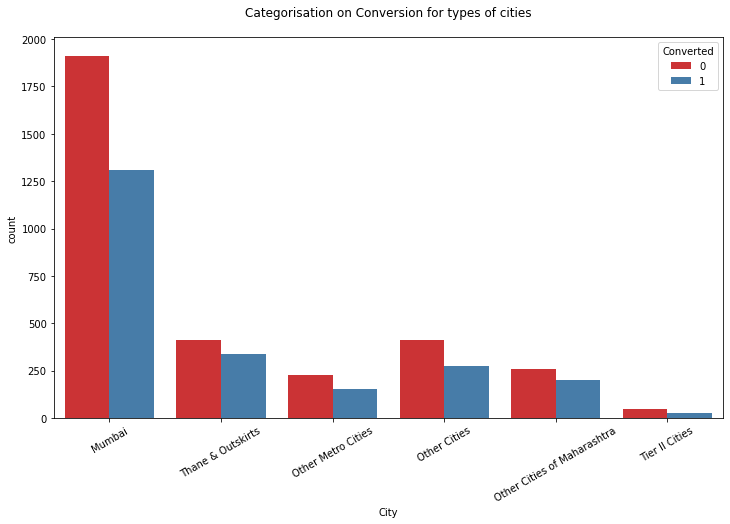

In [351]:
# Plot City Column Count
plt.figure(figsize = (12, 7))
c1 = sns.countplot(leads.City, hue = leads.Converted, palette = 'Set1')
plt.title("Categorisation on Conversion for types of cities\n")
c1.set_xticklabels(c1.get_xticklabels(), rotation = 30)
plt.show()

In [352]:
# Replacing NaN with Mumbai (Mode for Categorical)
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

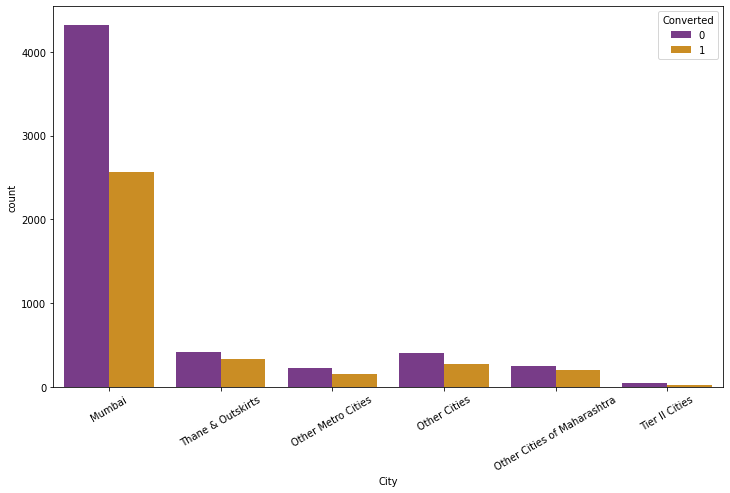

In [353]:
# Plotting after imputing the missing values
plt.figure(figsize = (12, 7))
c1 = sns.countplot(leads.City, hue = leads.Converted, palette = 'CMRmap')
c1.set_xticklabels(c1.get_xticklabels(), rotation = 30)
plt.show()

In [354]:
leads['City'] = leads['City'].fillna(leads['City'].mode()[0])

#### NUMERICAL VARIABLES

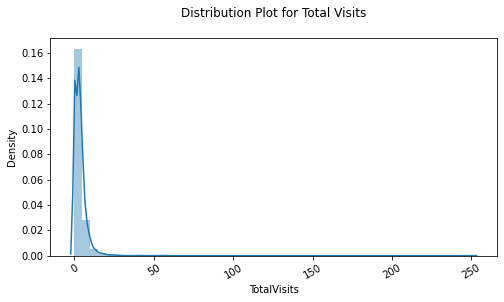

In [355]:
plt.figure(figsize = (8,4))
# distribution plot for Total number of Visits
sns.distplot(leads['TotalVisits'])

plt.title('Distribution Plot for Total Visits\n')
plt.xticks(rotation = 30)
plt.show()

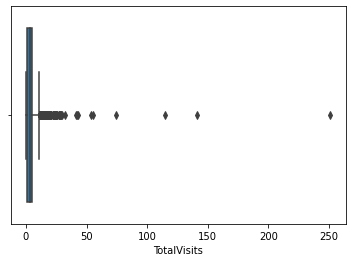

In [356]:
#  Checking for outliers using Box plots 
sns.boxplot(leads['TotalVisits'])

Since there are a lot of outliers in the data column. So, we can't impute mean values to the missing values. So we have to impute median.

In [357]:
#  Handling Total Visits
leads['TotalVisits'].fillna(leads['TotalVisits'].median(), inplace = True)

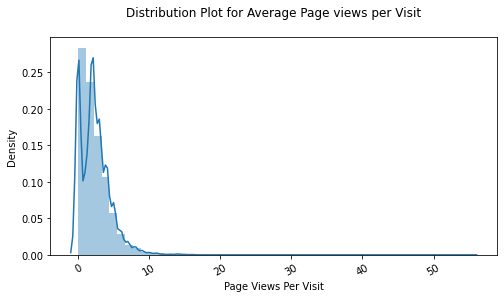

In [358]:
plt.figure(figsize = (8,4))
# distribution plot for Page views per number of Visits
sns.distplot(leads['Page Views Per Visit'])

plt.title('Distribution Plot for Average Page views per Visit\n')
plt.xticks(rotation = 30)
plt.show()

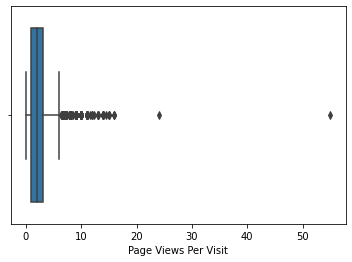

In [359]:
#  Checking for outliers using Box plots 
sns.boxplot(leads['Page Views Per Visit'])

In [360]:
#  Handling Page Views Per Visit
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace = True)

In [361]:
leads.isnull().sum()
# checking if any more columns left with Null values

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

Now that all the missing values are imputed. But we need to check for the data Imbalance if any left in the lead data.

In [362]:
# source_list is the list of columns which has the names of the redundant columns
source_list = ['Search','Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']
for i in source_list:
  print(leads[i].value_counts(normalize = True))

No     0.998485
Yes    0.001515
Name: Search, dtype: float64
No    1.0
Name: Magazine, dtype: float64
No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64
No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64
No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64
No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64
No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64


OBSERVATIONS:
1. iN ALL THE ABOVE COLUMNS THE DATA IS HIGHLY SKEWED. SO THEY ALSO HAVE TO DROPPED.

In [363]:
leads = leads.drop(source_list, axis = 1)
# dropping the redundant columns

In [364]:
leads['Lead Origin'].value_counts(normalize = True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

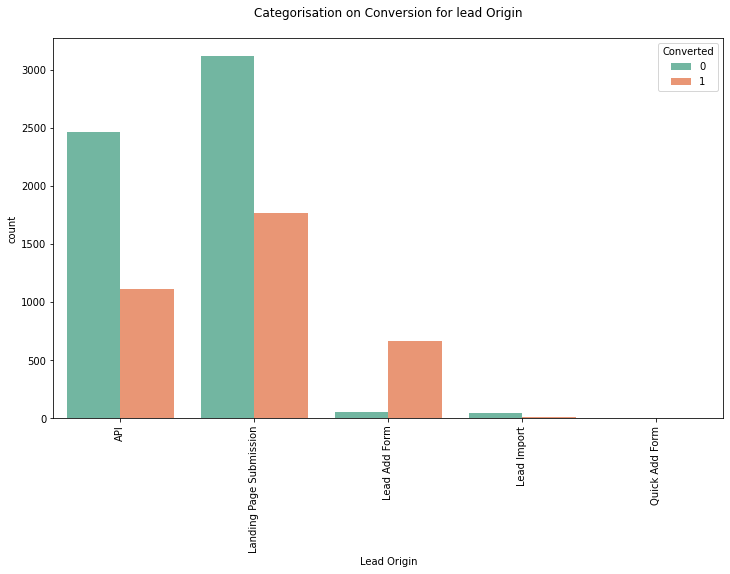

In [365]:
# Plotting Catgeorisation of Lead Origin w.r.t Converted 
plt.figure(figsize = (12, 7))
c1 = sns.countplot(leads['Lead Origin'], hue = leads.Converted, palette = 'Set2')
plt.title("Categorisation on Conversion for lead Origin\n")
c1.set_xticklabels(c1.get_xticklabels(), rotation = 90)
plt.show()

OBSERVATIONS:
1. Landing Page Submission has higher conversion leads followed by API

In [366]:
# Do Not Call is a highly skewed Column hence should be dropped
leads['Do Not Call'].value_counts(dropna = False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

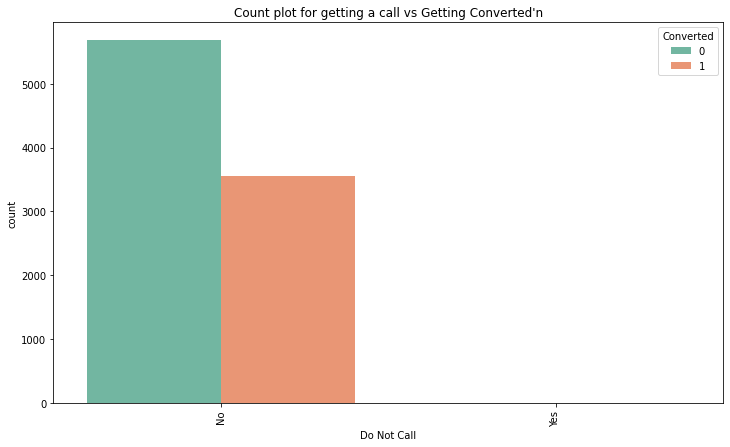

In [367]:
# Plot
plt.figure(figsize = (12, 7))
c1 = sns.countplot(leads['Do Not Call'], hue = leads.Converted, palette = 'Set2')
plt.title("Count plot for getting a call vs Getting Converted'n")
c1.set_xticklabels(c1.get_xticklabels(), rotation = 90)
plt.show()

OBSERVATIONS:
1. tHE DATA IS HIGLY SKEWED.
2.  We can drop Do Not Call

Last Notable Activity

In [368]:
# Checking last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [369]:
# Replacing low occuring variables with Other Notable Activity
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Received', 'View in browser link Clicked', 'Resubscribed to emails', 'Approached upfront', 'Email Marked Spam', 'Had a Phone Conversation', 'Unreachable','Unsubscribed','Email Bounced', 'Olark Chat Conversation'], 'Other Notable Activity')

In [370]:
leads['Last Notable Activity'].value_counts()

Modified                     3407
Email Opened                 2827
SMS Sent                     2172
Other Notable Activity        342
Page Visited on Website       318
Email Link Clicked            173
Form Submitted on Website       1
Name: Last Notable Activity, dtype: int64

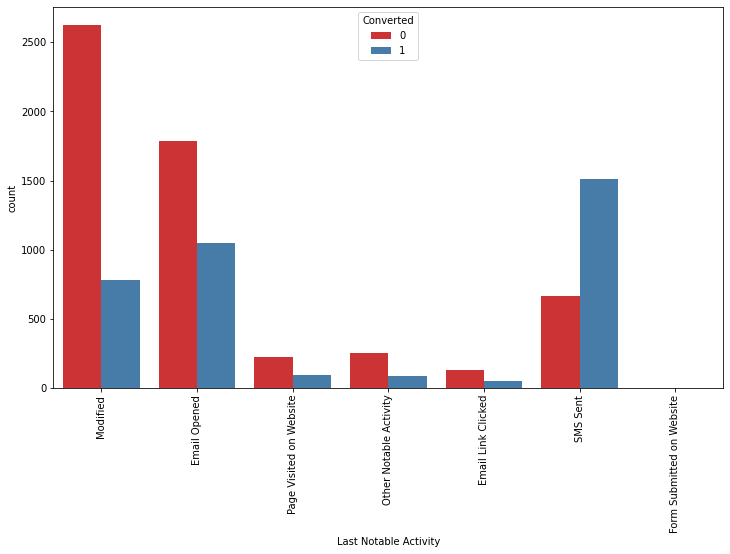

In [371]:
# Plotting Last Notable Activity
plt.figure(figsize = (12, 7))
c1 = sns.countplot(leads['Last Notable Activity'], hue = leads.Converted, palette = 'Set1')
c1.set_xticklabels(c1.get_xticklabels(), rotation = 90)
plt.show()

In [372]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


### DATATYPE CORRECTION

In [373]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

CORRECTING THE DATATYPES

In [374]:
# Total visits should be an integer but it has float datatype due to Null values
# converting float to integer 
leads['TotalVisits'] = leads['TotalVisits'].astype('int64')

In [375]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   int64  
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

Converting the Binary Variables (yes/no) to (0/1)


In [376]:
# List of variables to map
varlist = [ 'Do Not Email',	'Do Not Call', 	'Receive More Updates About Our Courses',	'Update me on Supply Chain Content',	'Get updates on DM Content',  'I agree to pay the amount through cheque',	'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [377]:
leads.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.0,9240.0,9240.0,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.438636,487.698268,2.357440,0.0,0.0,0.0,0.0,0.312554
std,23405.995698,0.270435,0.014711,0.486714,4.819024,548.021466,2.145781,0.0,0.0,0.0,0.0,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.0,0.0,0.0,0.0,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.0,0.0,0.0,0.0,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,0.0,0.0,0.0,0.0,1.000000


OBSERVATIONS:
1. We can see that 4 columns have only one value i.e. 0. 
2. So, they can be dropped.

In [378]:
# Dropping Variables which are redundant after getting converted from Yes or No to 1 or 0
# Columns_dropping is the list of those redundant columns
Columns_Dropping = ['Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque', 'Do Not Call']

In [379]:
leads = leads.drop(Columns_Dropping, 1)
leads.shape

(9240, 16)

### **OUTLIERS DETECTION**

In [380]:
leads.describe()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.079437,0.385390,3.438636,487.698268,2.357440,0.312554
std,23405.995698,0.270435,0.486714,4.819024,548.021466,2.145781,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000
50%,615479.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000
75%,637387.250000,0.000000,1.000000,5.000000,936.000000,3.000000,1.000000
max,660737.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000


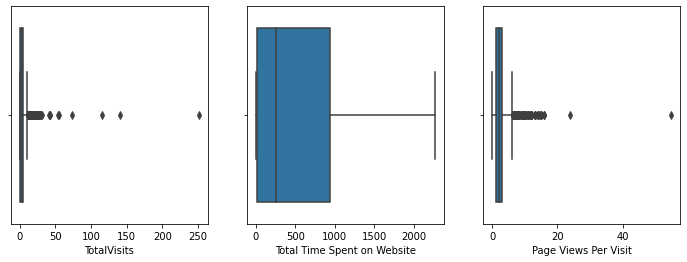

In [381]:
# Box Plot for all the numerical variables to check for Outliers
plt.figure(figsize = (12, 4))
plt.subplot(1,3,1)
sns.boxplot(data = leads, x ='TotalVisits')
plt.subplot(1,3,2)
sns.boxplot(data = leads, x ='Total Time Spent on Website')
plt.subplot(1,3,3)
sns.boxplot(data = leads, x ='Page Views Per Visit')

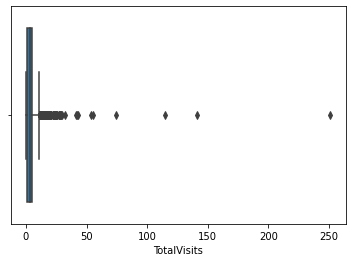

In [382]:
#  Checking for outliers using Box plots 
sns.boxplot(leads['TotalVisits'])

Since box plot shows there are a lot of outliers because no person will visit a education website for 100 times or more than that. 

In [383]:
# DEFINING THE IQR - INTER QUARTILE RANGES
def iqr(column):
  IQR = leads[column].quantile([0.75][0]) - leads[column].quantile([0.25][0])
  return IQR
# DEFINING THE FUNCTION Q3 FOR 75TH PERCENTILE VALUE
def q3(column):
  Q3 = leads[column].quantile([0.75][0])
  return Q3
# DEFINING THE FUNCTION Q3 FOR 25TH PERCENTILE VALUE
def q1(column):
  Q1 = leads[column].quantile([0.25][0])
  return Q1
# IQR = 75th percentile - 25th percentile
# upper bound=Q3+1.5*IQR
# lower bound=Q1-1.5*IQR

For Total Visits

In [384]:
# FINDING THE UPPER BOUND AND LOWER BOUND FOR TotalVisits
upper_bound =  q3('TotalVisits') + 1.5*iqr('TotalVisits')
lower_bound =  q1('TotalVisits') - 1.5*iqr('TotalVisits')

In [385]:
leads[(leads['TotalVisits'] > upper_bound) | (leads['TotalVisits']< lower_bound)].head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
56,59e722da-edff-43d9-af61-f5c8bcc986c4,659998,Landing Page Submission,Referral Sites,0,1,13,436,13.0,Form Submitted on Website,Management Specializations,Unemployed,Busy,Other Metro Cities,0,Modified
58,d93bfdc0-4719-4f0a-ad6b-31070823dfbb,659942,Landing Page Submission,Organic Search,0,0,17,409,8.5,Email Opened,Management Specializations,Unemployed,Interested in other courses,Mumbai,1,Modified
102,d103d8be-52e8-41aa-850a-6651f10641c6,659474,Landing Page Submission,Google,0,0,12,809,4.0,Unreachable,Management Specializations,Unemployed,Will revert after reading the email,Mumbai,0,Modified
125,46921843-bfc8-443d-96f8-18495891aef6,659241,API,Referral Sites,0,0,16,53,16.0,Olark Chat Conversation,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified
168,ba13e654-406e-4d3f-9fc1-0803087a41eb,658756,Landing Page Submission,Referral Sites,0,0,12,493,12.0,Email Link Clicked,Management Specializations,Unemployed,Will revert after reading the email,Thane & Outskirts,1,Email Link Clicked


In [386]:
leads[(leads['TotalVisits'] > upper_bound) | (leads['TotalVisits']< lower_bound)].shape[0]*100/len(leads)

2.8896103896103895

So, the number of Outliers are only 2% of the data. So, we can drop these outlier rows.


Removing the Outliers

In [387]:
leads = leads[~((leads['TotalVisits'] > upper_bound) | (leads['TotalVisits'] < lower_bound))]
leads.shape

(8973, 16)

For Page Views Per Visit

In [388]:
# FINDING THE UPPER BOUND AND LOWER BOUND FOR Page Views Per Visit
upper_bound =  q3('Page Views Per Visit') + 1.5*iqr('Page Views Per Visit')
lower_bound =  q1('Page Views Per Visit') - 1.5*iqr('Page Views Per Visit')

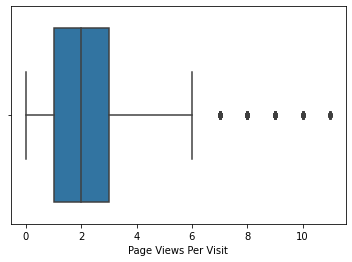

In [389]:
sns.boxplot(leads['Page Views Per Visit'])

In [390]:
leads['Page Views Per Visit'].max()

11.0

In [391]:
# Page Views Per Visit
leads['Page Views Per Visit'].describe(percentiles = [0.05, 0.25, 0.50, 0.75, 0.99])

count    8973.000000
mean        2.271752
std         1.946753
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
99%         8.000000
max        11.000000
Name: Page Views Per Visit, dtype: float64

OBSERVATIONS: 
Now, althouh there are some out of range values present but it would lead to loss of data if we remove them as they form 10% of the original data. So, we will let it go.

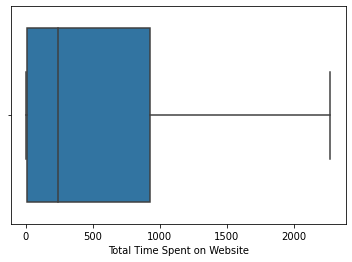

In [392]:
# bOX PLOT FOR tOTAL TIME SPENT ON THE WEBSITE
sns.boxplot(leads['Total Time Spent on Website'])

OBSERVATIONS:
1. This column has no outliers as we can observe from the Box plot. 
2. All the outliers are cleared now.

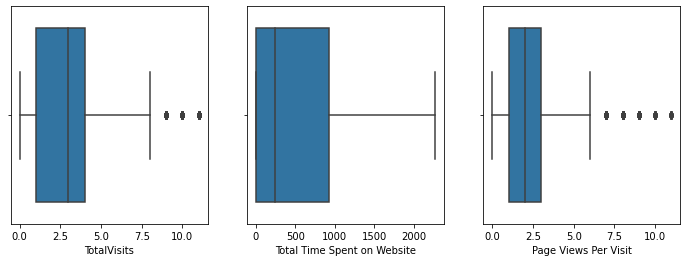

In [393]:
# Box Plot for all the numerical variables after removal of Outliers
plt.figure(figsize = (12, 4))
plt.subplot(1,3,1)
sns.boxplot(data = leads, x ='TotalVisits')
plt.subplot(1,3,2)
sns.boxplot(data = leads, x ='Total Time Spent on Website')
plt.subplot(1,3,3)
sns.boxplot(data = leads, x ='Page Views Per Visit')

# **EXPLORATORY DATA ANALYSIS**

## CHECKING DATA IMBALANCE

In [394]:
leads['Converted'].value_counts(normalize = True)

0    0.616182
1    0.383818
Name: Converted, dtype: float64

So,approximately 1 is 38 percent and 0 is 62 percent. Hence, there is no data Imbalance. 

Text(0.5, 1.0, 'Conversion Rate\n')

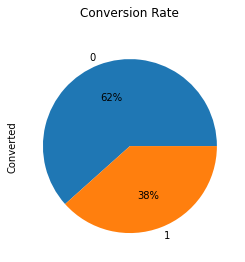

In [395]:
leads['Converted'].value_counts(normalize = True).plot.pie(autopct ='%1.0f%%')
plt.ylabel("Converted")
plt.title('Conversion Rate\n')

## UNIVARIATE ANALYSIS

### SEGMENTED UNIVARIATE ANALYSIS

In [396]:
leads.columns
# Viewing the columns 

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### NUMERICAL VARIABLE

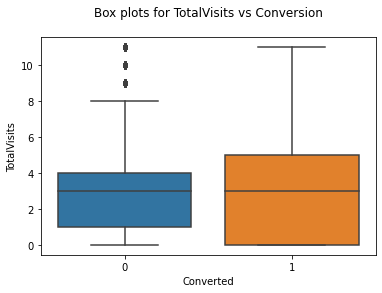

In [397]:
# TotalVisits Vs Converted
sns.boxplot(data = leads, y = 'TotalVisits', x = 'Converted')
plt.title("Box plots for TotalVisits vs Conversion\n")
plt.show()

OBSERVATIONS:
1. In TotalVisits the median is close for both Converted and Non Converted

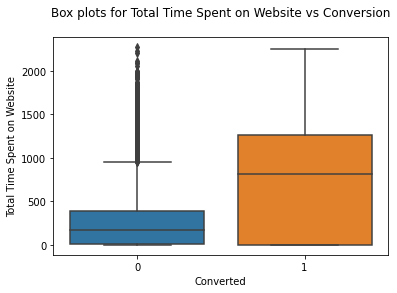

In [398]:
# Total Time Spent on Website Vs Converted
sns.boxplot(y = leads['Total Time Spent on Website'], x = leads['Converted'])
plt.title("Box plots for Total Time Spent on Website vs Conversion\n")
plt.show()

OBSERVATIONS:
1. If Total Time Spent on Website is more than Leads Converted are more

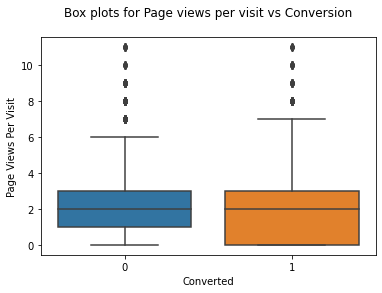

In [399]:
# Page Views Per Visit Vs Converted
sns.boxplot(y = leads['Page Views Per Visit'], x = leads.Converted)
plt.title("Box plots for Page views per visit vs Conversion\n")
plt.show()

observations:
1. Median for Page Views Per Visit Converted and Non Converted is almost same

In [400]:
converter = leads[leads['Converted'] == 1]
non_converter = leads[leads['Converted'] == 0]

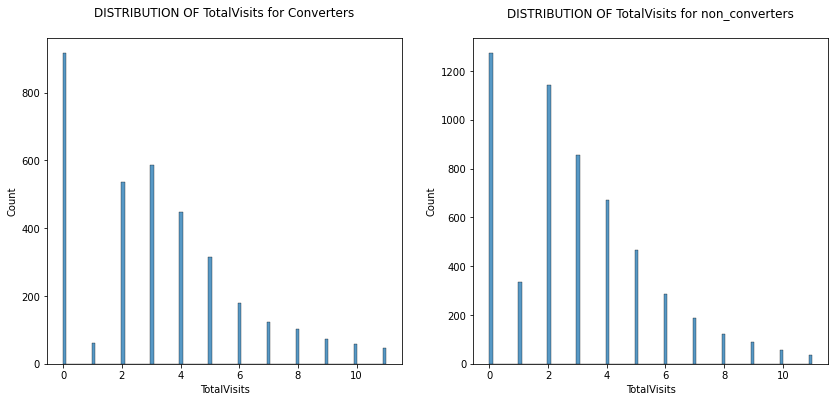

In [401]:
# GETTING THE SEGMENTED DATA FOR TOTAL_INCOME
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
# bins=[i for i in range(0,1000000,50000)]
sns.histplot(converter["TotalVisits"], bins = 100)
plt.title("DISTRIBUTION OF TotalVisits for Converters\n")
plt.subplot(1,2,2)
bins=[i for i in range(0,1000000,50000)]
sns.histplot(non_converter["TotalVisits"], bins = 100)
plt.title("DISTRIBUTION OF TotalVisits for non_converters\n")
plt.show()

CONCLUSION : 
1. TotalVisits PATTERN IS SAME FOR BOTH Converter AND non_converter. SO, IT CAN NOT BE CONSIDERED as a proper Driver Vriable.

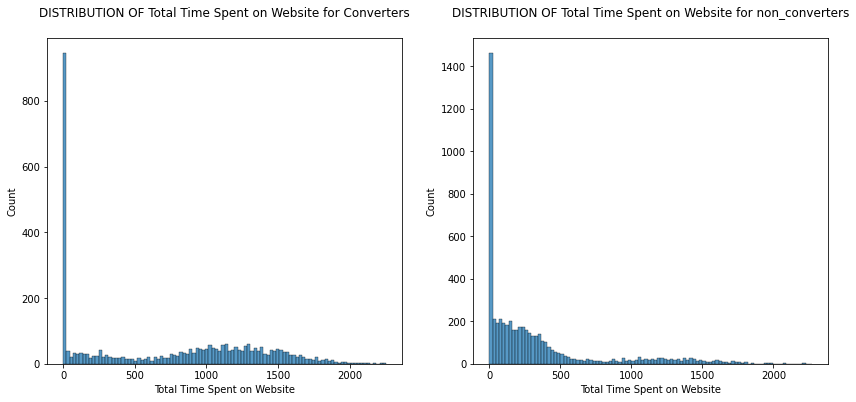

In [402]:
# GETTING THE SEGMENTED DATA FOR TOTAL_INCOME
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
# bins=[i for i in range(0,1000000,50000)]
sns.histplot(converter["Total Time Spent on Website"], bins = 100)
plt.title("DISTRIBUTION OF Total Time Spent on Website for Converters\n")
plt.subplot(1,2,2)
bins=[i for i in range(0,1000000,50000)]
sns.histplot(non_converter["Total Time Spent on Website"], bins = 100)
plt.title("DISTRIBUTION OF Total Time Spent on Website for non_converters\n")
plt.show()

#### CATEGORICAL VARIABLE

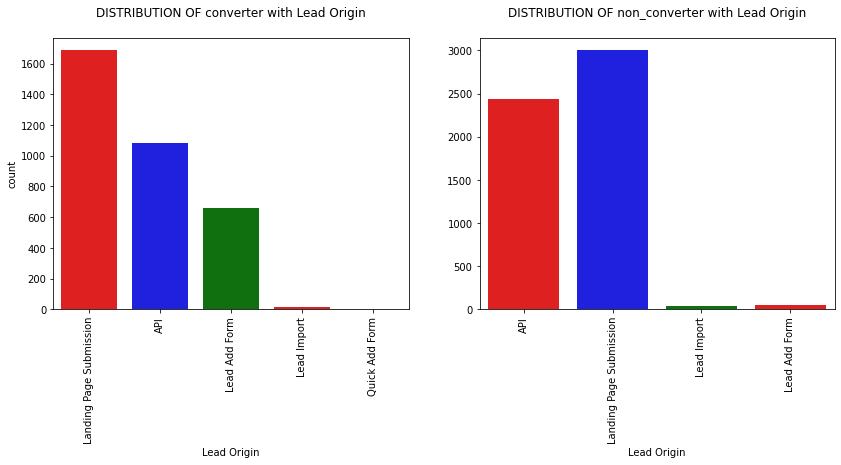

In [403]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data= converter,x= "Lead Origin",palette=["r","b","g"])
plt.xticks(rotation = 90)
plt.title("DISTRIBUTION OF converter with Lead Origin\n")
plt.subplot(1,2,2)
sns.countplot(data= non_converter,x= "Lead Origin",palette=["r","b","g"])
plt.xticks(rotation = 90)
plt.ylabel("")
plt.title("DISTRIBUTION OF non_converter with Lead Origin\n")
plt.show()

OBSERVATION
1. There seems to be some pattern in the data for converters.

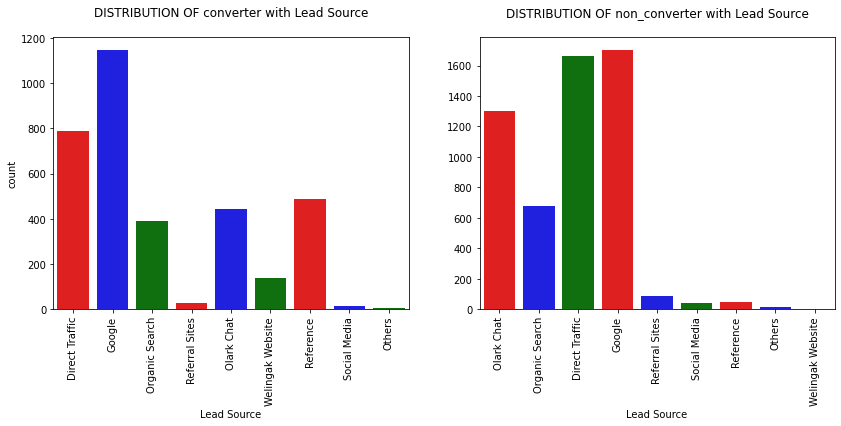

In [404]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data= converter,x= "Lead Source",palette=["r","b","g"])
plt.xticks(rotation = 90)
plt.title("DISTRIBUTION OF converter with Lead Source\n")
plt.subplot(1,2,2)
sns.countplot(data= non_converter,x= "Lead Source",palette=["r","b","g"])
plt.xticks(rotation = 90)
plt.ylabel("")
plt.title("DISTRIBUTION OF non_converter with Lead Source\n")
plt.show()

OBSERVATIONS:
1. Converters are having more number of References.

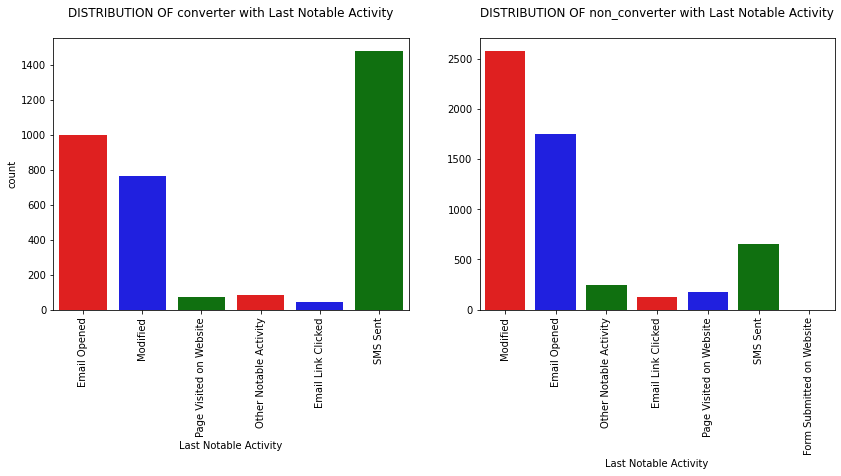

In [405]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data= converter,x= "Last Notable Activity",palette=["r","b","g"])
plt.xticks(rotation = 90)
plt.title("DISTRIBUTION OF converter with Last Notable Activity\n")
plt.subplot(1,2,2)
sns.countplot(data= non_converter,x= "Last Notable Activity",palette=["r","b","g"])
plt.xticks(rotation = 90)
plt.ylabel("")
plt.title("DISTRIBUTION OF non_converter with Last Notable Activity\n")
plt.show()

## BIVARIATE ANALYSIS

<Figure size 1008x432 with 0 Axes>

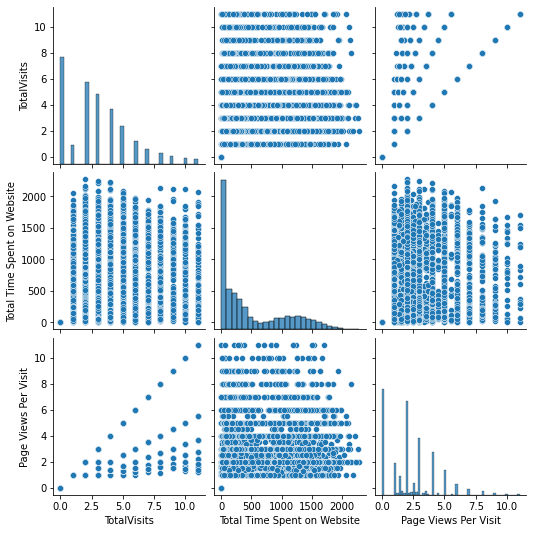

In [406]:
# PAIR PLOT FOR ALL THE NUMERICAL VARIABLES RELATED TO INCOME OR CREDIT 
plt.figure(figsize=(14,6))
sns.pairplot(leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
plt.show()
# PLOTTING A PAIPLOT WOULD GIVE ALL THE POSSIBLE CORRELATIONS WITH EACH OTHER.

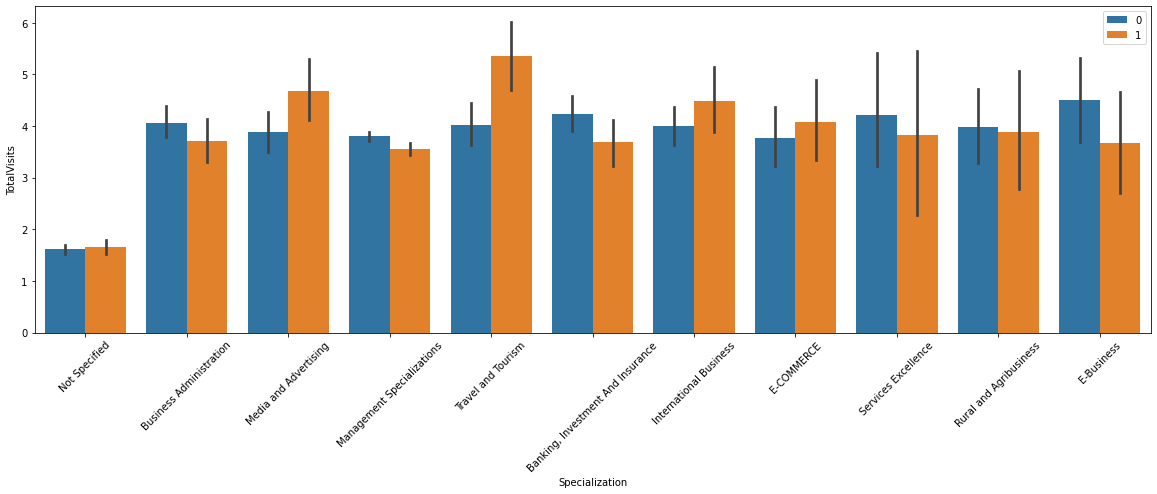

In [407]:
plt.figure(figsize = (20,6))
sns.barplot(y = leads['TotalVisits'],x= leads['Specialization'], hue = leads['Converted'])
plt.legend(loc = 'upper right')
plt.xticks(rotation = 45)
plt.show()

# **DATA PREPARATION**

## CREATING DUMMY VARIABLES

For Categorical Variables with Multiple levels, create dummy features(one-hot encoded)

In [408]:
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened


In [409]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

1. Since, Last Activity, Tags and Last Notable Activity is the data that is entered by the Sales Person from the company. 
2. This cannot be considered for model building. 
3. Because if they are included then the Originality of the model will be lost. 
4. This data comes from the step where the salesperson has to contact and collect data for only those leads who have a good lead score. So, this data is a part of post model evaluation. 

In [410]:
new_leads = leads.drop(['Last Activity','Tags', 'Last Notable Activity'], axis = 1)

In [411]:
new_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [412]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(new_leads['Lead Origin'], drop_first=True, prefix = 'LeadOrigin')
# Adding the results to the master dataframe
new_leads = pd.concat([new_leads, dummy1], axis=1)

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(new_leads['Lead Source'], drop_first=True, prefix = 'LeadSource')
# Adding the results to the master dataframe
new_leads = pd.concat([new_leads, dummy1], axis=1)

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(new_leads['Specialization'], drop_first=True, prefix = 'Specialization')
# Adding the results to the master dataframe
new_leads = pd.concat([new_leads, dummy1], axis=1)

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(new_leads['City'], drop_first=True, prefix = 'City')
# Adding the results to the master dataframe
new_leads = pd.concat([new_leads, dummy1], axis=1)

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(new_leads['What is your current occupation'], drop_first=True, prefix = 'CurrentOccupation')
# Adding the results to the master dataframe
new_leads = pd.concat([new_leads, dummy1], axis=1)

In [413]:
# Dropping the Repeated Columns 
# We have created dummies for the below variables, so we can drop them
new_leads = new_leads.drop(['Lead Origin','Lead Source', 'Specialization', 'City', 'What is your current occupation'], axis =1)

In [414]:
new_leads.shape
# new_leads is the final prepared data to be fed into train test split

(8973, 40)

### Train-Test Split

In [415]:
# Putting feature variable to X and dependent variable into y
y = new_leads['Converted']
X = new_leads.drop(['Converted','Prospect ID', 'Lead Number'], axis=1)
# dropping Prospect ID and Lead Number since they are unique to each Lead
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional
0,0,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,5,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,2,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [416]:
# splitting the data into train test split using train_test_split from sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

## FEATURE SCALING

In [417]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional
4503,0,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3804,0,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3285,0,8,1144,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5523,1,1,82,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5170,0,5,284,2.5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [418]:
#  numerical type variables
num  = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

MinMaxScaler can affect the feature scaling if outliers are present. So, we shall use StandardScaler for feature scaling.

In [419]:
scaler = StandardScaler()
X_train[num] = scaler.fit_transform(X_train[num])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional
4503,0,-1.173300,-0.886102,-1.178549,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3804,0,-1.173300,-0.886102,-1.178549,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3285,0,1.961323,1.196377,-0.140266,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5523,1,-0.781472,-0.736833,-0.659407,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5170,0,0.785839,-0.369123,0.119305,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# **MODEL BUILDING**

#### Running the first logistic model

In [420]:
# logm1 contains the model prepared using GLM from statsmodels module.
# Since, statsmodels doesnt add the constant value by itself so we have to add manually
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
# Now the model can be fit into the X_train for training
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6281
Model:                            GLM   Df Residuals:                     6243
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.1
Date:                Tue, 10 May 2022   Deviance:                       5756.2
Time:                        12:13:25   Pearson chi2:                 7.22e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.2882      1.119      0.258      0.797      -1.904       2.481
Do Not Email                                 -1.2553      0.163     -7.699      0.000      -1.575      -0.936
TotalVisits                                   0.2130      0.053      4.019      0.000       0.109       0.317
Total Time Spent on Website                   1.0949      0.039     28.233      0.000       1.019       1.171
Page Views Per Visit                         -0.1396      0.056     -2.497      0.013      -0.249      -0.030
A free copy of Mastering The Interview       -0.0493      0.105     -0.469      0.639      -0.255       0.157
LeadOrigin_Landing Page Submission           -0.8442      0.134     -6.323      0.000      -1.106      -0.583
LeadOrigin_Lead Add Form                      3.7469      0.507      7.385      0.000       2.753       4.741
LeadOrigin_Lead Import                        0.5054      1.983      0.255      0.799      -3.382       4.392
LeadOrigin_Quick Add Form                    20.3654   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
LeadSource_Google                             0.2019      0.109      1.848      0.065      -0.012       0.416
LeadSource_Olark Chat                         1.0657      0.153      6.953      0.000       0.765       1.366
LeadSource_Organic Search                     0.1483      0.125      1.187      0.235      -0.097       0.393
LeadSource_Others                            -1.6216      1.047     -1.549      0.121      -3.674       0.431
LeadSource_Reference                          0.0379      0.551      0.069      0.945      -1.042       1.118
LeadSource_Referral Sites                    -0.6655      0.361     -1.843      0.065      -1.373       0.042
LeadSource_Social Media                      -0.4874      1.982     -0.246      0.806      -4.371       3.397
LeadSource_Welingak Website                   3.3784      1.127      2.998      0.003       1.170       5.587
Specialization_Business Administration       -0.0833      0.229     -0.365      0.715      -0.531       0.365
Specialization_E-Business                     0.2263      0.431      0.525      0.599      -0.618       1.070
Specialization_E-COMMERCE                    -0.0813      0.332     -0.245      0.807      -0.733       0.570
Specialization_International Business        -0.1069      0.287     -0.373      0.709      -0.670       0.456
Specialization_Management Specializations    -0.0976      0.174     -0.562      0.574      -0.438       0.243
Specialization_Media and Advertising         -0.4407      0.288     -1.533      0.125      -1.004       0.123
Specialization_Not Specified                 -1.1719      0.204     -5.736      0.000      -1.572      -0.771
Spe

This model seems very hectic and unreadable due to large number of variables. So, we will find the top 15 variables.

#### FEATURE SELECTION

In [421]:
# logreg is the loistic regression modelused from sklearn module.
logreg = LogisticRegression()
# rfe is the function used to select n best features from the model
rfe = RFE(logreg, n_features_to_select=15)
# then the Xand y values can be feed into the model with n features selected
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True])

In [422]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
# listing down all the columns with their rfe value and whether they are selected or not

[('Do Not Email', True, 1),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 18),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 16),
 ('LeadOrigin_Quick Add Form', False, 13),
 ('LeadSource_Google', False, 6),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 9),
 ('LeadSource_Others', True, 1),
 ('LeadSource_Reference', False, 5),
 ('LeadSource_Referral Sites', True, 1),
 ('LeadSource_Social Media', False, 17),
 ('LeadSource_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 22),
 ('Specialization_E-Business', False, 2),
 ('Specialization_E-COMMERCE', False, 23),
 ('Specialization_International Business', False, 20),
 ('Specialization_Management Specializations', False, 21),
 ('Specialization_Media and Advertising', True, 1),
 ('Specialization_N

In [423]:
#  so we have got our top 15 features 
sel_cols = X_train.columns[rfe.support_]
remov_cols = X_train.columns[~rfe.support_]
X_train_new = X_train[sel_cols]
X_train_new.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Others',
       'LeadSource_Referral Sites', 'LeadSource_Welingak Website',
       'Specialization_Media and Advertising', 'Specialization_Not Specified',
       'CurrentOccupation_Housewife', 'CurrentOccupation_Other',
       'CurrentOccupation_Student', 'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional'],
      dtype='object')

#### Checking for Collinearity through Heat-map

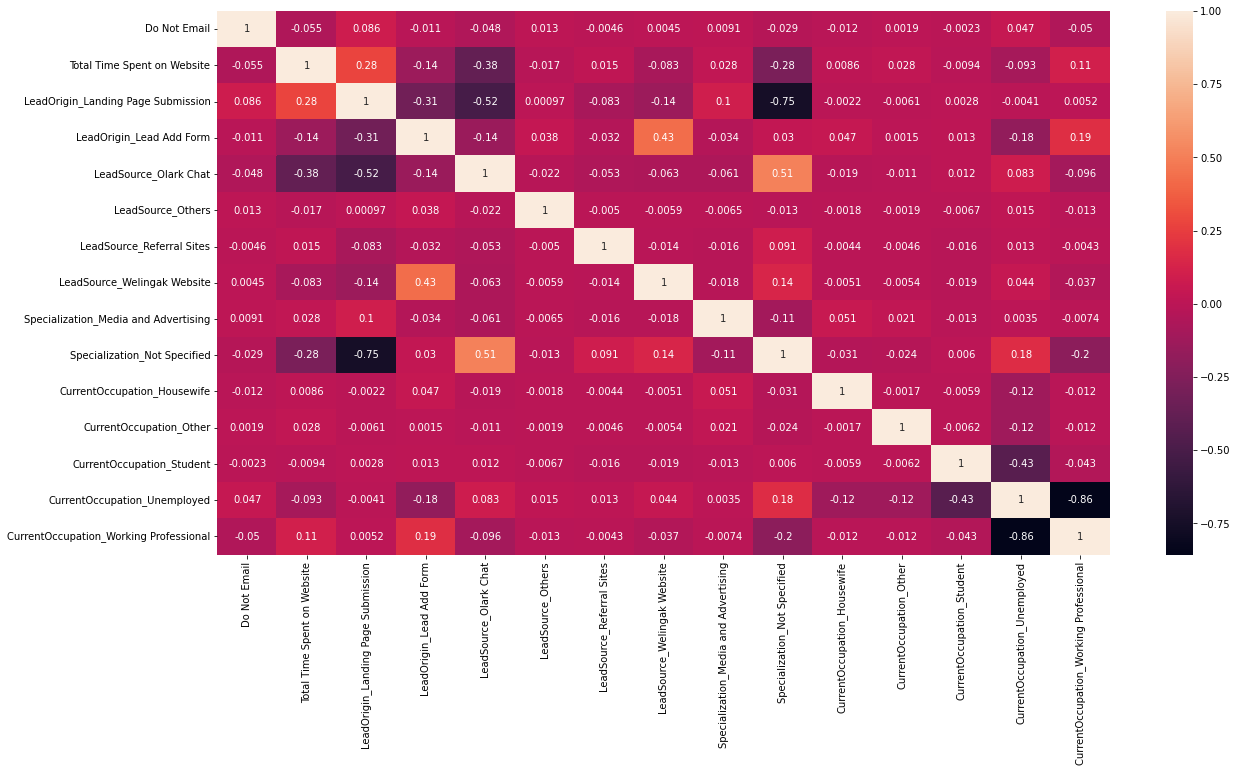

In [424]:
plt.figure(figsize = (20,10))
corr = X_train_new.corr()
# prepared the correlation matrix using corr function to check for the Correlations between all the features so that we can remove Multicollinearity
sns.heatmap(corr, annot = True)
# heatmap gives better visualisations of the Correlations
plt.show()

Accessing the Model with statsmodels

#### Model Building 1

In [425]:
X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6281
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2892.7
Date:                Tue, 10 May 2022   Deviance:                       5785.5
Time:                        12:13:32   Pearson chi2:                 7.21e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.4221      1.101      0.383      0.701      -1.736       2.580
Do Not Email                              -1.2966      0.160     -8.123      0.000      -1.609      -0.984
Total Time Spent on Website                1.1037      0.038     28.679      0.000       1.028       1.179
LeadOrigin_Landing Page Submission        -0.9405      0.124     -7.579      0.000      -1.184      -0.697
LeadOrigin_Lead Add Form                   3.5447      0.213     16.603      0.000       3.126       3.963
LeadSource_Olark Chat                      0.8009      0.113      7.071      0.000       0.579       1.023
LeadSource_Others                         -1.7302      0.991     -1.746      0.081      -3.673       0.213
LeadSource_Referral Sites                 -0.7824      0.349     -2.244      0.025      -1.466      -0.099
LeadSource_Welingak Website                3.3268      1.028      3.237      0.001       1.313       5.341
Specialization_Media and Advertising      -0.3237      0.236     -1.370      0.171      -0.787       0.139
Specialization_Not Specified              -1.1329      0.119     -9.547      0.000      -1.366      -0.900
CurrentOccupation_Housewife               21.9440   1.25e+04      0.002      0.999   -2.45e+04    2.45e+04
CurrentOccupation_Other                   -0.6039      1.311     -0.461      0.645      -3.173       1.965
CurrentOccupation_Student                 -0.4731      1.121     -0.422      0.673      -2.670       1.723
CurrentOccupation_Unemployed              -0.5183      1.099     -0.471      0.637      -2.673       1.636
CurrentOccupation_Working Professional     1.9487      1.112      1.753      0.080      -0.230       4.127
==========================================================================================================
"""

observations:
1. CurrentOccupation_Housewife has 0.99 as the p_value. So, it needs to be dropped

#### Model Building 2

In [426]:
X_train_sm = X_train_sm.drop('CurrentOccupation_Housewife', axis = 1)
# columns are are being from the dataset fopr being insignificant
nonsig_cols = []
nonsig_cols.append('CurrentOccupation_Housewife')
# Also it should be dropped from the X_test dataset too
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6281
Model:                            GLM   Df Residuals:                     6266
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2895.0
Date:                Tue, 10 May 2022   Deviance:                       5790.1
Time:                        12:13:32   Pearson chi2:                 7.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.9436      0.854      2.276      0.023       0.270       3.617
Do Not Email                              -1.2970      0.160     -8.126      0.000      -1.610      -0.984
Total Time Spent on Website                1.1034      0.038     28.679      0.000       1.028       1.179
LeadOrigin_Landing Page Submission        -0.9361      0.124     -7.548      0.000      -1.179      -0.693
LeadOrigin_Lead Add Form                   3.5465      0.213     16.611      0.000       3.128       3.965
LeadSource_Olark Chat                      0.8006      0.113      7.066      0.000       0.579       1.023
LeadSource_Others                         -1.7298      0.991     -1.746      0.081      -3.672       0.212
LeadSource_Referral Sites                 -0.7809      0.349     -2.240      0.025      -1.464      -0.098
LeadSource_Welingak Website                3.3261      1.028      3.237      0.001       1.312       5.340
Specialization_Media and Advertising      -0.3103      0.235     -1.321      0.186      -0.770       0.150
Specialization_Not Specified              -1.1306      0.119     -9.532      0.000      -1.363      -0.898
CurrentOccupation_Other                   -2.1291      1.109     -1.921      0.055      -4.302       0.044
CurrentOccupation_Student                 -1.9980      0.875     -2.283      0.022      -3.713      -0.283
CurrentOccupation_Unemployed              -2.0433      0.847     -2.412      0.016      -3.704      -0.383
CurrentOccupation_Working Professional     0.4232      0.863      0.490      0.624      -1.268       2.115
==========================================================================================================
"""

observations:
1. CurrentOccupation_Working Professional has 0.60 as the p_value. So, it needs to be dropped

#### Model Building 3

In [427]:
X_train_sm = X_train_sm.drop('CurrentOccupation_Working Professional', axis = 1)
nonsig_cols.append('CurrentOccupation_Working Professional')

logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6281
Model:                            GLM   Df Residuals:                     6267
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2895.2
Date:                Tue, 10 May 2022   Deviance:                       5790.3
Time:                        12:13:32   Pearson chi2:                 7.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    2.3525      0.198     11.879      0.000       1.964       2.741
Do Not Email                            -1.2963      0.160     -8.123      0.000      -1.609      -0.984
Total Time Spent on Website              1.1034      0.038     28.680      0.000       1.028       1.179
LeadOrigin_Landing Page Submission      -0.9362      0.124     -7.547      0.000      -1.179      -0.693
LeadOrigin_Lead Add Form                 3.5463      0.214     16.610      0.000       3.128       3.965
LeadSource_Olark Chat                    0.8008      0.113      7.067      0.000       0.579       1.023
LeadSource_Others                       -1.7298      0.991     -1.746      0.081      -3.672       0.212
LeadSource_Referral Sites               -0.7798      0.348     -2.238      0.025      -1.463      -0.097
LeadSource_Welingak Website              3.3263      1.028      3.237      0.001       1.312       5.340
Specialization_Media and Advertising    -0.3135      0.235     -1.334      0.182      -0.774       0.147
Specialization_Not Specified            -1.1311      0.119     -9.533      0.000      -1.364      -0.899
CurrentOccupation_Other                 -2.5376      0.735     -3.453      0.001      -3.978      -1.097
CurrentOccupation_Student               -2.4066      0.276     -8.715      0.000      -2.948      -1.865
CurrentOccupation_Unemployed            -2.4519      0.169    -14.473      0.000      -2.784      -2.120
========================================================================================================
"""

observations:
1. LeadSource_Others has 0.08 > 0.05 as the p_value which is insignificant. So, it needs to be dropped

#### Model Building 4

In [428]:
X_train_sm = X_train_sm.drop('LeadSource_Others', axis = 1)
nonsig_cols.append('LeadSource_Others')
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6281
Model:                            GLM   Df Residuals:                     6268
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.8
Date:                Tue, 10 May 2022   Deviance:                       5793.7
Time:                        12:13:32   Pearson chi2:                 7.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    2.3521      0.198     11.879      0.000       1.964       2.740
Do Not Email                            -1.2946      0.159     -8.126      0.000      -1.607      -0.982
Total Time Spent on Website              1.1046      0.038     28.711      0.000       1.029       1.180
LeadOrigin_Landing Page Submission      -0.9355      0.124     -7.543      0.000      -1.179      -0.692
LeadOrigin_Lead Add Form                 3.5146      0.211     16.633      0.000       3.100       3.929
LeadSource_Olark Chat                    0.8031      0.113      7.088      0.000       0.581       1.025
LeadSource_Referral Sites               -0.7790      0.349     -2.235      0.025      -1.462      -0.096
LeadSource_Welingak Website              3.3598      1.027      3.271      0.001       1.347       5.373
Specialization_Media and Advertising    -0.3113      0.235     -1.324      0.185      -0.772       0.149
Specialization_Not Specified            -1.1289      0.119     -9.518      0.000      -1.361      -0.896
CurrentOccupation_Other                 -2.5384      0.735     -3.455      0.001      -3.978      -1.098
CurrentOccupation_Student               -2.4069      0.276     -8.721      0.000      -2.948      -1.866
CurrentOccupation_Unemployed            -2.4550      0.169    -14.493      0.000      -2.787      -2.123
========================================================================================================
"""

observations:
1. All Columns show signiicant p values. Now, lets check the Multicollinearity.

In [429]:
# Checking the VIFs 
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,22.39
1,Do Not Email,1.02
2,Total Time Spent on Website,1.25
3,LeadOrigin_Landing Page Submission,3.55
4,LeadOrigin_Lead Add Form,1.84
5,LeadSource_Olark Chat,1.82
6,LeadSource_Referral Sites,1.04
7,LeadSource_Welingak Website,1.31
8,Specialization_Media and Advertising,1.01
9,Specialization_Not Specified,2.98


The vif values is less than 5 for all the variables.

FINAL OBSERVATIONS:
1. Hence, we have removed the insignificant variables using p_value and Multicollinearity issue using VIF i.e. variance inflation factor. So, here we have finalised our model and now we can proceed to check for the model performance in training and test data set.

# **MODEL EVALUATION**

### PREDICTION ON TRAINED DATA



In [430]:
# y_train_pred contains the array of predicted probablity by the model for training data 
y_train_pred = res.predict(X_train_sm)

In [431]:
y_train_pred = y_train_pred.values.reshape(-1)

In [432]:
y_train_pred

array([0.19664058, 0.19664058, 0.93923693, ..., 0.72807332, 0.19664058,
       0.13419317])

In [433]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Conversion_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()
# y_train_pred_final is the dataframe that contains the Converted data, the Conversion probability predicted by the model and the Lead numbers.

,Converted,Conversion_prob,Lead Number
0,0,0.196641,4503
1,0,0.196641,3804
2,1,0.939237,3285
3,0,0.041213,5523
4,1,0.190596,5170


#### Decide the Threshold of the Probability

1. Manual

In [434]:
#  we can manually decide the threshold and check if that is correct or wrong
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Lead Number,Predicted
0,0,0.196641,4503,0
1,0,0.196641,3804,0
2,1,0.939237,3285,1
3,0,0.041213,5523,0
4,1,0.190596,5170,0


Confusion Matrix and Accuracy

In [435]:
# confusion variable contains the values of the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3389  464]
 [ 856 1572]]


In [436]:
# Checking the accuracy
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
accuracy

0.7898423817863398

But accuracy is not enough for deciding the Model is good enough. we need to check the sensitivity and specificity.

In [437]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Drawing the ROC Curve

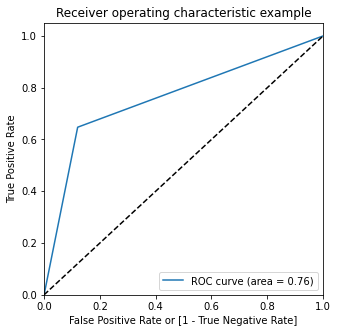

In [438]:
# Shows the data between sensitivity and specificity
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Predicted)

In [439]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
  y_train_pred_final[i] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196641,4503,0,1,1,0,0,0,0,0,0,0,0
1,0,0.196641,3804,0,1,1,0,0,0,0,0,0,0,0
2,1,0.939237,3285,1,1,1,1,1,1,1,1,1,1,1
3,0,0.041213,5523,0,1,0,0,0,0,0,0,0,0,0
4,1,0.190596,5170,0,1,1,0,0,0,0,0,0,0,0


In [440]:
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
for i in numbers:
  cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
  total1 = sum(sum(cm1))
  accuracy = (cm1[0,0]+cm1[1,1])/total1
    
  speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386563  1.000000  0.000000
0.1   0.1  0.451202  0.992175  0.110304
0.2   0.2  0.735711  0.829077  0.676875
0.3   0.3  0.798281  0.786656  0.805606
0.4   0.4  0.803057  0.737232  0.844537
0.5   0.5  0.789842  0.647446  0.879574
0.6   0.6  0.774240  0.554366  0.912795
0.7   0.7  0.753702  0.448517  0.946016
0.8   0.8  0.725362  0.328254  0.975603
0.9   0.9  0.705142  0.251236  0.991176


#### Finding the Threshold from graph

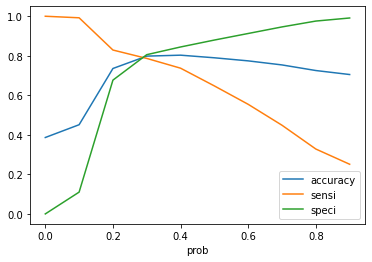

In [441]:
# drawing the line plot for 'accuracy','sensitivity','specificity'
cutoff_df.plot.line(x = 'prob', y=['accuracy','sensi','speci'])
plt.show()

Based on line plot above, we can see that the curve for accuracy,sensitivity and specificity intersect at 0.3. So, we check the prediction and accuracy,sensitivity and specificity for this value.

In [442]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Conversion_prob':y_train_pred, 'Lead_score': y_train_pred *100})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()
# The lead probabilty multiplied by 100 is decided as the Lead score

,Converted,Conversion_prob,Lead_score,Lead Number
0,0,0.196641,19.664058,4503
1,0,0.196641,19.664058,3804
2,1,0.939237,93.923693,3285
3,0,0.041213,4.121332,5523
4,1,0.190596,19.059590,5170


In [443]:
# check the prediction  for this 0.3.
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x>=0.30 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Lead_score,Lead Number,Predicted
0,0,0.196641,19.664058,4503,0
1,0,0.196641,19.664058,3804,0
2,1,0.939237,93.923693,3285,1
3,0,0.041213,4.121332,5523,0
4,1,0.190596,19.059590,5170,0


#### PREDICTING THE LEAD SCORE FOR TRAINED DATA

In [444]:
training_lead_score = y_train_pred_final[['Lead Number', 'Lead_score']]
training_lead_score.head()

,Lead Number,Lead_score
0,4503,19.664058
1,3804,19.664058
2,3285,93.923693
3,5523,4.121332
4,5170,19.059590


#### CONFUSION MATRIX AND SENSITIVITY

In [445]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3104  749]
 [ 518 1910]]


In [446]:
# Checking the accuracy
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
accuracy

0.7982805285782518

In [447]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [448]:
total1 = sum(sum(confusion))
accuracy = (confusion[0,0]+confusion[1,1])/total1
  
speci = confusion[0,0]/(confusion[0,0]+confusion[0,1])
sensi = confusion[1,1]/(confusion[1,0]+confusion[1,1])
Model_perf =[accuracy,sensi,speci]
print(Model_perf)

[0.7982805285782518, 0.78665568369028, 0.8056060212821178]


#### Observation For Train Data and ROC Curve

#### ROC Curve Area: 76%
#### Cutoff Probability: 0.3
#### Accuracy: 79%
#### Sensitivity: 78.7%
#### Specificity: 80.2%

### PREDICTION ON TEST DATA

#### Precision And Recall

In [449]:
p,r, thresholds = metrics.precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

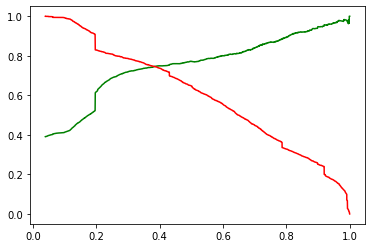

In [450]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()
# line plot for precision and recall shows that they meet at 0.3 again.So, our threshold value is confrmed

According to Precision and recall also,the graph intersects at 0.3-0.4

#### Model Evaluation on Test Data

In [451]:
# dropping the columns that are redundant in the test data to fit the model
X_test[num] = scaler.transform(X_test[num])

In [452]:
# X_test_new contains the final data which can be fit into the model directly for prediction
X_test_new = X_test.drop(remov_cols, axis = 1)
X_test_new = X_test_new.drop(nonsig_cols, axis = 1)
X_test_new.head()

,Do Not Email,Total Time Spent on Website,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Referral Sites,LeadSource_Welingak Website,Specialization_Media and Advertising,Specialization_Not Specified,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed
7619,0,-0.886102,0,0,1,0,0,0,1,0,0,1
7095,0,1.039827,1,0,0,0,0,0,0,0,0,1
6206,0,-0.512930,1,0,0,0,0,0,0,0,0,1
7750,0,-0.339997,1,0,0,0,0,1,0,0,0,0
240,0,-0.531134,0,0,0,0,0,0,0,0,0,1


In [453]:
# Constant is being added as it is not present from before
X_test_sm = sm.add_constant(X_test_new)

In [454]:
# y_test_pred contains the Predicted probability value arrays for the test data 
y_test_pred = res.predict(X_test_sm)

In [455]:
y_test_pred_final = pd.DataFrame({'Converted': y_test.values, 'Conversion_prob':y_test_pred,'Lead_score':y_test_pred*100})
y_test_pred_final['Lead Number'] = y_test.index
y_test_pred_final.head()
# y_test_pred_final is the dataframe that contains the Converted data, the Conversion probability predicted by the model and the Lead numbers.

,Converted,Conversion_prob,Lead_score,Lead Number
7619,0,0.196641,19.664058,7619
7095,1,0.527519,52.751904,7095
6206,0,0.167285,16.728492,6206
7750,1,0.674744,67.474386,7750
240,1,0.334124,33.412399,240


In [456]:
y_test_pred_final['Predicted'] = y_test_pred_final.Conversion_prob.map(lambda x: 1 if x>= 0.3 else 0)
y_test_pred_final.head()
# applying the threshold value to the test data so that we can check the predictions with the dependent variable for test data

,Converted,Conversion_prob,Lead_score,Lead Number,Predicted
7619,0,0.196641,19.664058,7619,0
7095,1,0.527519,52.751904,7095,1
6206,0,0.167285,16.728492,6206,0
7750,1,0.674744,67.474386,7750,1
240,1,0.334124,33.412399,240,1


In [457]:
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
print(confusion)

[[1372  304]
 [ 241  775]]


In [458]:
# Checking the accuracy
accuracy = metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)
accuracy

0.7975482912332839

In [459]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [460]:
total1 = sum(sum(confusion))
accuracy = (confusion[0,0]+confusion[1,1])/total1
  
speci = confusion[0,0]/(confusion[0,0]+confusion[0,1])
sensi = confusion[1,1]/(confusion[1,0]+confusion[1,1])
Model_perf =[accuracy,sensi,speci]
print(Model_perf)
# Checking the accuracy,sensitivity and specificity value for Test data

[0.7975482912332839, 0.7627952755905512, 0.8186157517899761]


 Test Data Observation
#### Accuracy: ~80%
#### Sensitivity: ~77%
#### Specificity: ~82%

Final Observation:
#### ROC Curve Area: 0.76
#### CutOff Probability: 0.3
#### Comparing Train and Test Data Observation:
#### Train Data   ------------------------      Test Data
##### Accuracy: 80%       -------------       Accuracy: 80%
##### Sensitivity: 78.4%     -------------        Sensitivity: 77%
##### Specificity: 81%     -------------       Specificity: 82%

#### PREDICTING THE LEAD SCORE FOR TEST DATA

In [461]:
test_final = y_test_pred_final[['Lead Number', 'Lead_score']]
test_final['Lead_score'] = test_final['Lead_score']
test_final.head()
# The lead probabilty multiplied by 100 is decided as the Lead score

,Lead Number,Lead_score
7619,7619,19.664058
7095,7095,52.751904
6206,6206,16.728492
7750,7750,67.474386
240,240,33.412399


**Based on the Model evaluation, if the lead score is greater than or equal to 30.0 then it can be considered a potential Lead. The Sales team can approach then to the respectice potential leads.**